In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import recall_score,precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../ayush/Downloads/creditcard.csv")

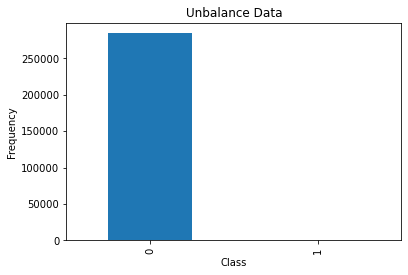

In [4]:
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])

In [6]:
total= No_of_frauds + No_of_normals

In [7]:
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

In [8]:
print("The number of normal transactions(Class 0) are: ", No_of_normals)

The number of normal transactions(Class 0) are:  284315


In [9]:
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)

The number of fraudulent transactions(Class 1) are:  492


In [10]:
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [11]:
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
X=data.drop(['Time','Amount'],axis=1)
y=data['Class']

In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [13]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (213605, 30)
X_test.shape:  (71202, 30)
y_train.shape:  (213605,)
y_test.shape:  (71202,)


In [14]:
classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)

In [27]:
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
con_mat = confusion_matrix(y_test, y_pred)

In [30]:
average_precision = average_precision_score(y_test, y_pred)

In [31]:
cls_report = classification_report(y_test, y_pred)

In [32]:
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))

Area under the curve : 1.000000


In [33]:
print("Average precision-recall score RF: {}".format(average_precision))

Average precision-recall score RF: 1.0


In [34]:
print(con_mat)

[[71078     0]
 [    0   124]]


In [35]:
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71078
           1       1.00      1.00      1.00       124

    accuracy                           1.00     71202
   macro avg       1.00      1.00      1.00     71202
weighted avg       1.00      1.00      1.00     71202



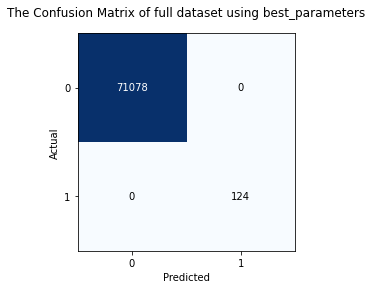

The accuracy is 100.0 %
The recall from the confusion matrix is 100.0 %


In [36]:
def confus_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix of full dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confus_matrix(con_mat)

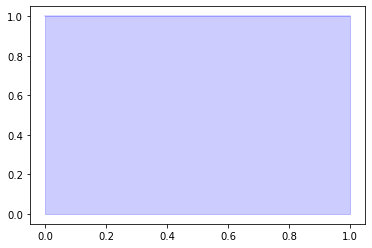

In [43]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

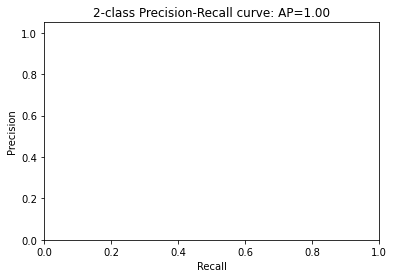

In [44]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

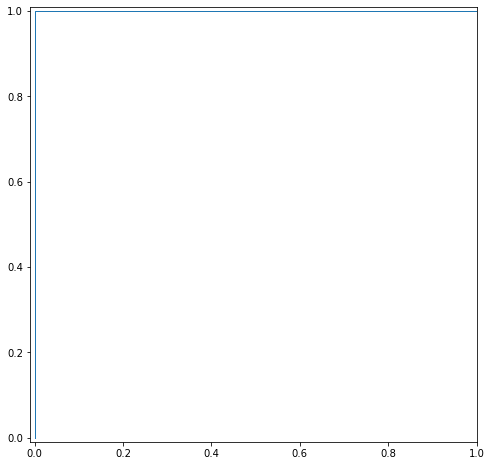

In [45]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

No handles with labels found to put in legend.


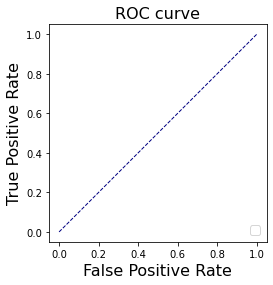

In [46]:
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()